In [2]:
import spacy
import pandas as pd

C:\Users\fenn\AppData\Local\Temp\ipykernel_427232\3891520469.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Get current working directory

### Config Variables

In [3]:
#inputLanguage = "english"
nlp = spacy.load('de_core_news_lg') # en_core_web_lg
LOADFILE = "C:\\Users\\fenn\Desktop\\tryPython\\summarizedWords2.txt"
SAVEFILE = "C:\\Users\\fenn\Desktop\\tryPython\\distanceMatrix.txt"  # change according to your needs
#print(pd.read_csv(LOADFILE, delimiter="\t").iloc[:, 0])  # for debug

### Data preparation

In [4]:
rawData = pd.read_csv(LOADFILE, delimiter="\t").iloc[:, 0].str.cat(others=None, sep=" ", na_rep=None, join='left') # reads in the file specified by LOADFILE, converting it to a single string of words separated by a blankspace




tokens = nlp(rawData)
print(len(tokens))
##cleans up data olny for concepts in the model
# Defined as a function to be used on multiple datasets if necessary 
def cleanData(data):
    cleanTokens = []
    for token in tokens:
        if not token.is_oov:
            cleanTokens.append(token) 
    return cleanTokens

cleanTokens = cleanData(tokens)
print(cleanTokens)
print(len(cleanTokens))

905
[abgaben, abgekoppelt, abgelehnt, abhängig, abhängigkeit, ablenkung, abnormal, abstimmung, afd, afrika, agressiv, akkus, aktionen, akzeptanz, alle, allgemeinheit, alternative, ambiente, and, änderung, änderungen, angenehm, angenommen, angst, annahme, anschaffung, anstrengung, anwendung, arbeitsrecht, ärger, armut, asien, atem, audio, aufbereitung, aufklären, aufklärung, aufmerksamkeit, aufschieben, aufträge, aufwändig, ausbau, ausbildung, ausgaben, auslagern, ausland, auswirkungen, auto, banken, barrieren, batterien, bäume, baustoffe, bedürfnisse, beitrag, belehren, benzin, berge, bergen, betrug, bevölkerung, bewegen, bezahlbar, bindend, blabla, blöd, blödsinn, boden, branchen, budget, bund, bundesrat, bürger, bürokratisch, but, calories, chance, chemie, cons, debatten, demokratie, dienstleistung, digitalisierung, diskussion, diskutieren, dont, doof, draussen, dringend, druck, dumm, dürre, effizient, egoismus, eingriff, einheitlich, einkaufen, einsatz, eis, elektro, elektroauto, em

### determining string distances

In [5]:
## Creates a matrix of word similarities
def calcDistanceMatrix(cleanTokens):
    df = pd.DataFrame(columns=cleanTokens, index = cleanTokens) # builds al empty pandas dataframe with rows and columns named after the words to be analyzed
    for token in cleanTokens:
        similiarities = []
        for token2 in cleanTokens:
            similiarities.append(token.similarity(token2))
        df[token] = similiarities
    return df

distanceMatrixDF = calcDistanceMatrix(cleanTokens)


#### Printing the Matrix (for testing/debug only)

In [6]:
print(distanceMatrixDF)

                 abgaben  abgekoppelt  abgelehnt  abhängig  abhängigkeit  \
abgaben         1.000000     0.320509   0.372764  0.310916      0.500219   
abgekoppelt     0.320509     1.000000   0.412541  0.563933      0.408809   
abgelehnt       0.372764     0.412541   1.000000  0.291502      0.306720   
abhängig        0.310916     0.563933   0.291502  1.000000      0.697593   
abhängigkeit    0.500219     0.408809   0.306720  0.697593      1.000000   
...                  ...          ...        ...       ...           ...   
zukunft         0.258329     0.114228   0.056934  0.117748      0.450070   
zusammenarbeit  0.311286     0.133290   0.138343  0.168991      0.462889   
zusammenhalt    0.372559     0.355363   0.200473  0.348955      0.610370   
zuschüsse       0.551092     0.259165   0.306194  0.216462      0.447238   
zwang           0.235620     0.149817   0.293922  0.075638      0.205225   

                ablenkung  abnormal  abstimmung       afd    afrika  ...  \
abgaben    

### Exporting a .txt file to/with the location specified by the SAVEFILE variable

In [19]:
#export DataFrame to text file
with open(SAVEFILE, 'w') as f:  # overwrites existing files of the same name and path. If you want to change that: change line to with open(SAVEFILE, 'x') as f:
    distMatString = distanceMatrixDF.to_string(header=True, index=True)
    f.write(distMatString)

In [20]:
import spacy
nlp = spacy.load('en_core_web_lg')

doc = nlp("Apple is looking at buying U.K. startup for $1 billion. I like apples. Apple is a big company. New York, Red Flag, I have a red flag.")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label, ent.label_)

print(nlp.get_pipe('ner').labels)

Apple 0 5 383 ORG
U.K. 27 31 384 GPE
$1 billion 44 54 394 MONEY
Apple 71 76 383 ORG
New York 95 103 384 GPE
Red Flag 105 113 383 ORG
('CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART')


In [21]:
import spacy
import numpy as np
nlp = spacy.load('en_core_web_lg')

def most_similar(word, topn=5):
  word = nlp.vocab[str(word)]
  queries = [
      w for w in word.vocab 
      if w.is_lower == word.is_lower  and np.count_nonzero(w.vector)
  ]

  by_similarity = sorted(queries, key=lambda w: word.similarity(w), reverse=True)
  return [(w.lower_,w.similarity(word)) for w in by_similarity[:topn+1] if w.lower_ != word.lower_]

print(most_similar("dog", topn=50))

[('she', 0.41524189710617065), ('when', 0.40957537293434143), ('he', 0.390671044588089), ('how', 0.38315147161483765), ('does', 0.37388527393341064), ('let', 0.37291908264160156), ('that', 0.3664986193180084), ('what', 0.3649815320968628), ('you', 0.3649410009384155), ('who', 0.36284059286117554), ('where', 0.36010709404945374), ("n't", 0.35870176553726196), ('they', 0.35863903164863586), ('why', 0.3551936447620392), ('can', 0.35339903831481934), ('ca', 0.3533383905887604), ('it', 0.3516964316368103), ('could', 0.34992530941963196), ('not', 0.34585222601890564), ('got', 0.3430679738521576), ('there', 0.34229207038879395), ('cause', 0.3414511978626251), ('should', 0.34123069047927856), ('is', 0.33961135149002075), ('would', 0.3353287875652313), ('might', 0.3347433805465698), ('need', 0.3323975205421448), ('wo', 0.3255627155303955), ('we', 0.32413962483406067), ('a', 0.3208402693271637), ('must', 0.31895139813423157), ('did', 0.3172534108161926), ('this', 0.31190353631973267), ("'re", 0.

[5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 15, 15, 16, 17]
[2, 3, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 15]
[5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15]


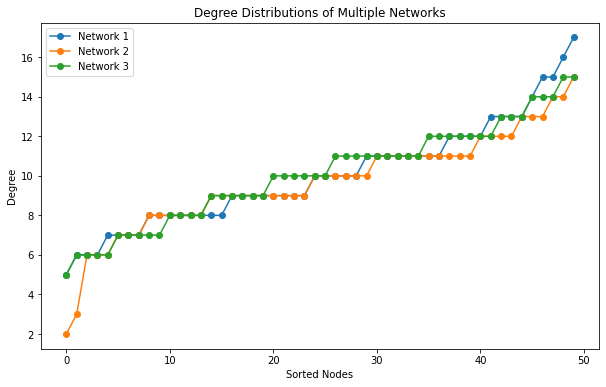

[5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 15, 15, 16, 17]
[2, 3, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 15]
[5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15]


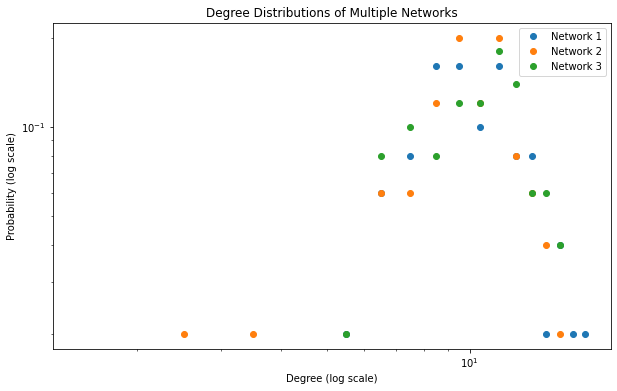

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Number of nodes in each network
num_nodes = 50

# Probability of edge creation for Erdős-Rényi graphs
p = 0.2

# Generate three random networks
networks = [nx.erdos_renyi_graph(num_nodes, p) for _ in range(3)]

# Plot the degree distributions on a line graph
plt.figure(figsize=(10, 6))

for i, G in enumerate(networks):
    degrees = dict(G.degree())
    degree_values = list(degrees.values())
    print(sorted(degree_values))

    plt.plot(sorted(degree_values), label=f'Network {i + 1}', marker='o')

plt.title('Degree Distributions of Multiple Networks')
plt.xlabel('Sorted Nodes')
plt.ylabel('Degree')
plt.legend()
plt.show()


# Plot the degree distributions on a line graph
plt.figure(figsize=(10, 6))

for i, G in enumerate(networks):
    degrees = dict(G.degree())
    degree_values = sorted(list(degrees.values()))
    print(degree_values)

    # Calculate degree distribution
    hist, bins = np.histogram(degree_values, bins=range(1, max(degree_values) + 2), density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2.

    # Plot degree distribution on log-log scale
    plt.loglog(bin_centers, hist, 'o', label=f'Network {i + 1}')

plt.title('Degree Distributions of Multiple Networks')
plt.xlabel('Degree (log scale)')
plt.ylabel('Probability (log scale)')
plt.legend()
plt.show()

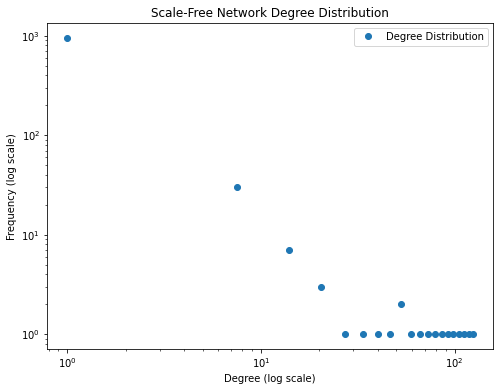

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Generate a scale-free network
scale_free_network = nx.scale_free_graph(1000, alpha=0.3, beta=0.2, gamma=0.5)

# Get degrees of all nodes
degrees = dict(scale_free_network.degree())

# Plot the degree distribution on a log-log scale
plt.figure(figsize=(8, 6))

# Convert degrees to a numpy array for easier manipulation
degree_values = np.array(list(degrees.values()))

# Calculate the histogram of degrees
hist, bins = np.histogram(degree_values, bins=20)

# Ensure no zero values (log(0) is undefined)
hist[hist == 0] = 1

# Plot the histogram on a log-log scale
plt.loglog(bins[:-1], hist, 'o', label='Degree Distribution')

plt.title('Scale-Free Network Degree Distribution')
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.legend()
plt.show()


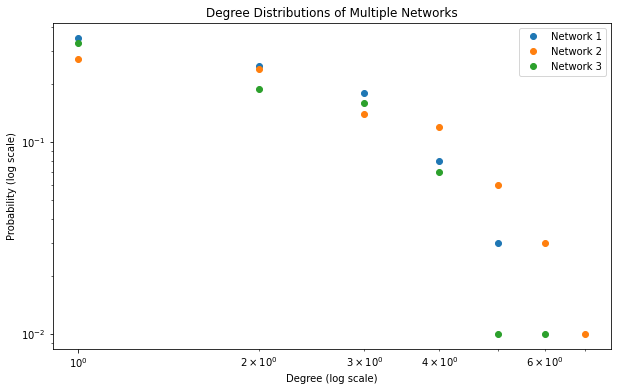

In [24]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Let's assume we have a list of networks
networks = [nx.gnp_random_graph(100, 0.02), nx.gnp_random_graph(100, 0.02), nx.gnp_random_graph(100, 0.02)]

plt.figure(figsize=(10, 6))

for i, G in enumerate(networks):
    degrees = dict(G.degree())
    degree_values = sorted(set(degrees.values()))
    histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

    # Plot degree distribution on log-log scale
    plt.loglog(degree_values, histogram, 'o', label=f'Network {i + 1}')

plt.title('Degree Distributions of Multiple Networks')
plt.xlabel('Degree (log scale)')
plt.ylabel('Probability (log scale)')
plt.legend()
plt.show()

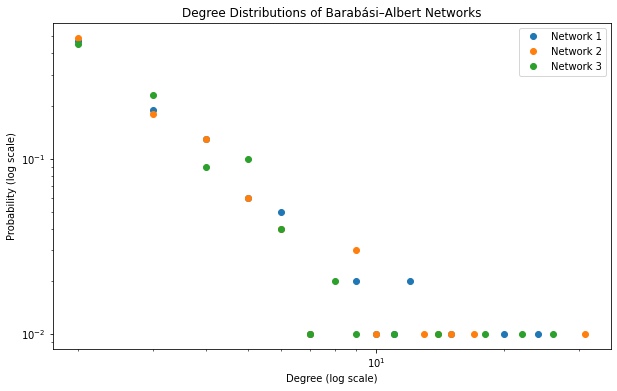

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Let's generate networks using the Barabási–Albert model
networks = [nx.barabasi_albert_graph(100, 2), nx.barabasi_albert_graph(100, 2), nx.barabasi_albert_graph(100, 2)]

plt.figure(figsize=(10, 6))

for i, G in enumerate(networks):
    degrees = dict(G.degree())
    degree_values = sorted(set(degrees.values()))
    histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

    # Plot degree distribution on log-log scale
    plt.loglog(degree_values, histogram, 'o', label=f'Network {i + 1}')

plt.title('Degree Distributions of Barabási–Albert Networks')
plt.xlabel('Degree (log scale)')
plt.ylabel('Probability (log scale)')
plt.legend()
plt.show()



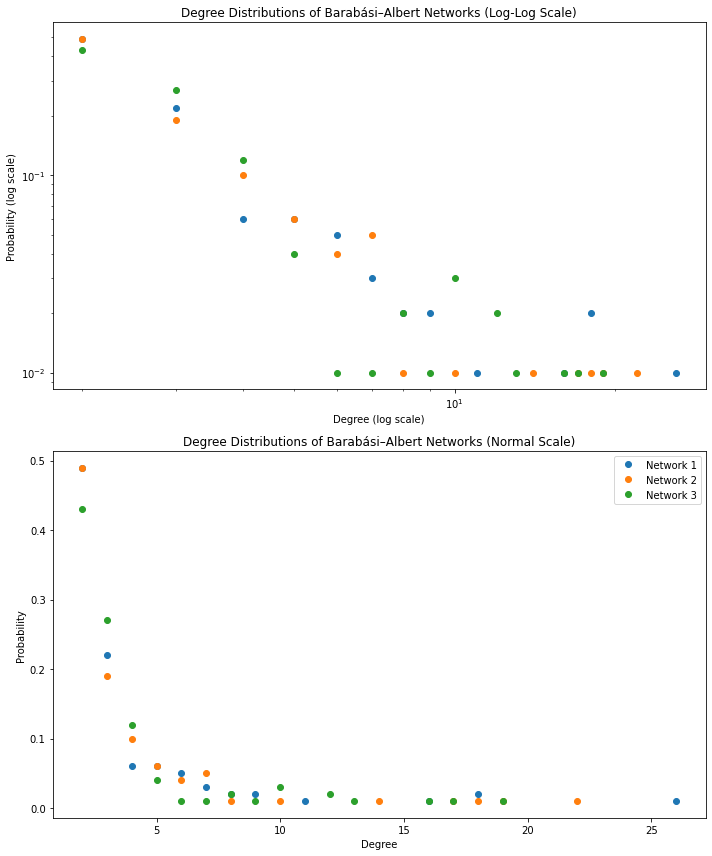

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Let's generate networks using the Barabási–Albert model
networks = [nx.barabasi_albert_graph(100, 2), nx.barabasi_albert_graph(100, 2), nx.barabasi_albert_graph(100, 2)]

fig, axs = plt.subplots(2, figsize=(10, 12))

for i, G in enumerate(networks):
    degrees = dict(G.degree())
    degree_values = sorted(set(degrees.values()))
    histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

    # Plot degree distribution on log-log scale
    axs[0].loglog(degree_values, histogram, 'o', label=f'Network {i + 1}')

    # Plot degree distribution on normal scale
    axs[1].plot(degree_values, histogram, 'o', label=f'Network {i + 1}')

axs[0].set_title('Degree Distributions of Barabási–Albert Networks (Log-Log Scale)')
axs[0].set_xlabel('Degree (log scale)')
axs[0].set_ylabel('Probability (log scale)')

axs[1].set_title('Degree Distributions of Barabási–Albert Networks (Normal Scale)')
axs[1].set_xlabel('Degree')
axs[1].set_ylabel('Probability')

plt.legend()
plt.tight_layout()
plt.show()